<a href="https://colab.research.google.com/github/SimonDelgado/Procesamiento-Digital-Multimedia/blob/main/Actividad%204/Actividad_4_DelgadoSimon_202840051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Simón Delgado</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA/blob/main/assets/scipy-signal-convolution.png?raw=1"/></center>


In [65]:
import numpy as np

In [66]:
import matplotlib.pyplot as plt

In [67]:
from scipy import signal

A continuación, se desarrollará la convolución entre una señal escalón y una señal gaussiana. Para esto, se definirán las funciones, se aplicará el teorema de la convolución utilizando .fft y luego la transformada inversa .ifft

Text(0.5, 0, 'tiempo [s]')

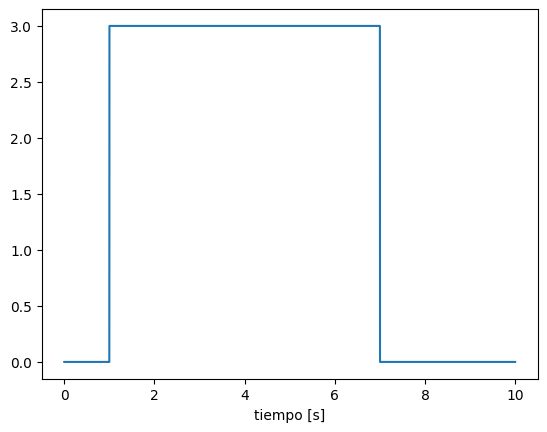

In [68]:
def pulso(x):
  u_1 = np.where(x >= t1, H, 0)
  u_2 = np.where(x >= t2, H, 0)
  return u_1 - u_2

T = 10 # tiempo de la muestra
dt = 0.001 # intervalo entre muestras
H = 3 # altura de el pulso
t1 = 1 # Inicio del pulso
t2 = 7 # Final del pulso
x = np.arange(0, T, dt)
plt.plot(x, pulso(x))
plt.xlabel('tiempo [s]')

Text(0.5, 0, 'tiempo [s]')

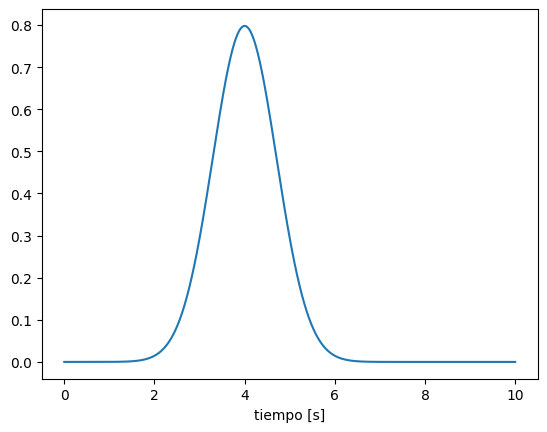

In [69]:
def gauss(u, mu, sigma):
  return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (((u - mu) ** 2) / sigma))

plt.plot(x, gauss(x, 4, 0.5))
plt.xlabel('tiempo [s]')

Para generar la convolución, se utilizará el teorema de la convolución:

$$F(f*g)=F(f) \cdot F(g)$$

Se utilizará la transformada rápida de Fourier

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'tiempo [s]')

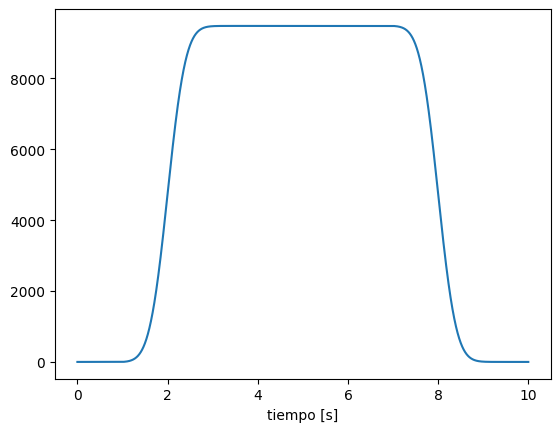

In [70]:
def FFT_conv(x):
  return np.fft.fft(pulso(x)) * np.fft.fft(gauss(x, 1, 0.1)) # multiplicación de transformadas

def conv(x):
  return np.fft.ifft(FFT_conv(x)) # transformada inversa de la convolución

plt.plot(x, conv(x))
plt.xlabel('tiempo [s]')

## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


In [71]:
def f(x):
  return np.sin(2*np.pi*5*x) + np.sin(2*np.pi*12*x) # se genera una señal con 2 sinusoides puras, con lo que existen 2 frecuencias predominantes

f_clean = f(x) # señal limpia

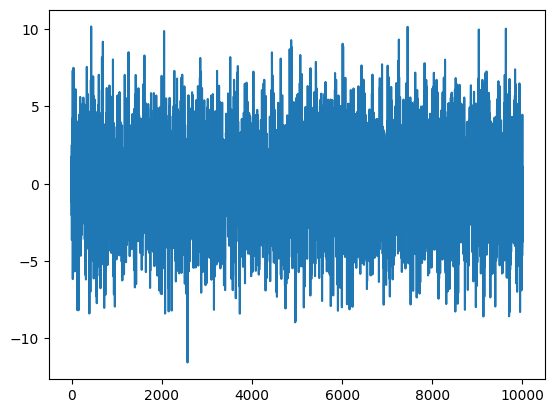

In [72]:
def f_noise(x): # señal con ruido agregado
  return f_clean + 2.5 * np.random.randn(len(x))

plt.plot(f_noise(x))

Se toma la señal anterior con ruido, asumiendo que no se conoce la función original

(0.0, 50.0)

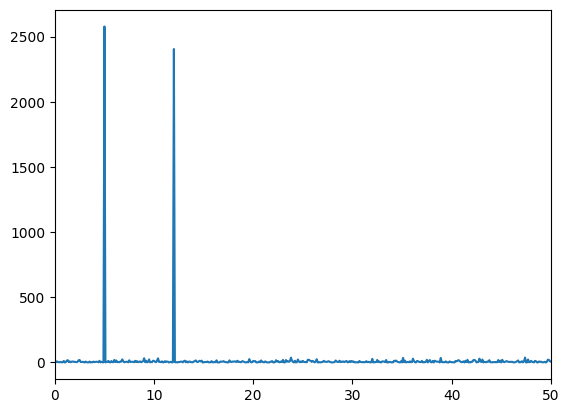

In [73]:
d = len(x)
fhat = np.fft.fft(f_noise(x), d) # se hace la fft de la señal
PSD = fhat * np.conj(fhat) / d # densidad espectral de potencia. Resulta de la multiplicación de la fft por su conjugado, lo que resulta en magnitud cuadrada
freq = (1 / (dt * d)) * np.arange(d) # se genera el eje de frecuencias
plt.plot(freq, PSD)
plt.xlim([0, 50])

Se tiene la mayor concentración de potencia para 2 frecuencias en particular. Se procede a filtrar, por lo que se eliminarán todas las frecuencias de baja potencia

Text(0.5, 1.0, 'Señal filtrada')

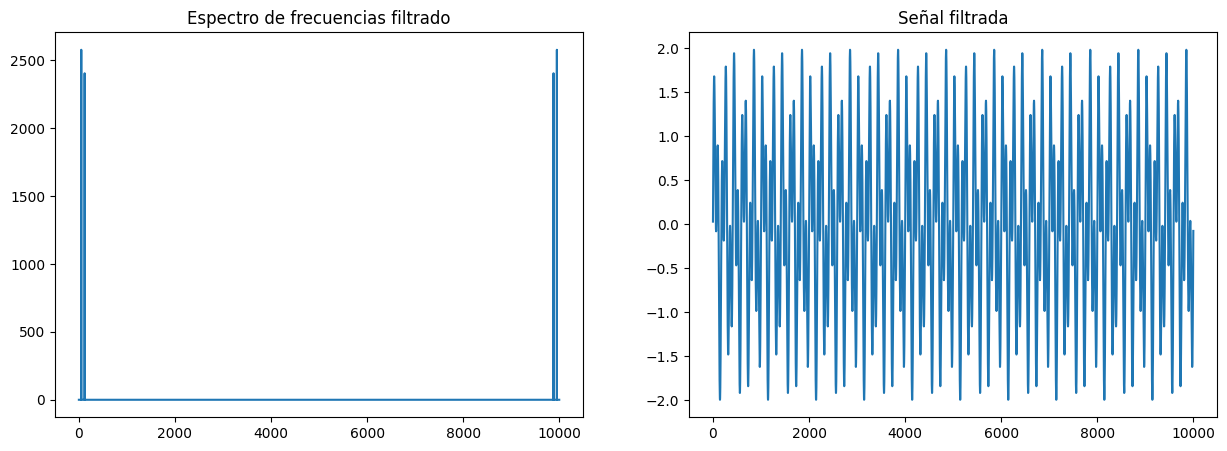

In [74]:
indices = PSD > 1000 # las componentes del PSD que sean menores a 1000 se les asignará 0 y las de mayor valor serán 1. Esto es el filtro
PSDclean = PSD * indices # la multiplicación elimina las frecuencias con magnitudes de potencia bajas, con lo que se aísla las 2 frecuencias con mayor potencia
fhat = fhat * indices # se aplica el filtro a la transformada de la señal, lo que elimina las frecuencias de ruido
f_filt = np.fft.ifft(fhat) # se vuelve al dominio del tiempo
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(PSDclean)
plt.title('Espectro de frecuencias filtrado')
plt.subplot(1, 2, 2)
plt.plot(f_filt)
plt.title('Señal filtrada')

Se grafica la primera señal para corroborar

Text(0.5, 1.0, 'Señal original')

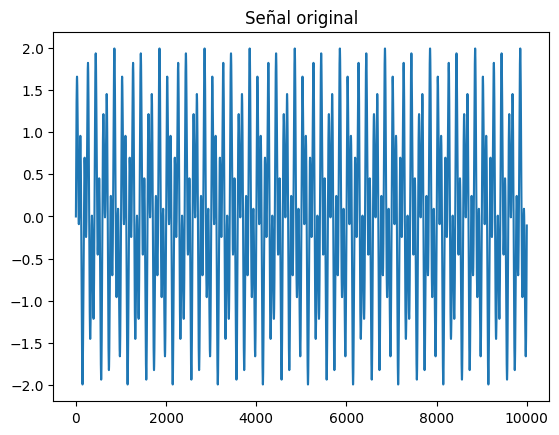

In [75]:
plt.plot(f_clean)
plt.title('Señal original')

Con esto, se corrobora que las 2 señales son iguales

## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


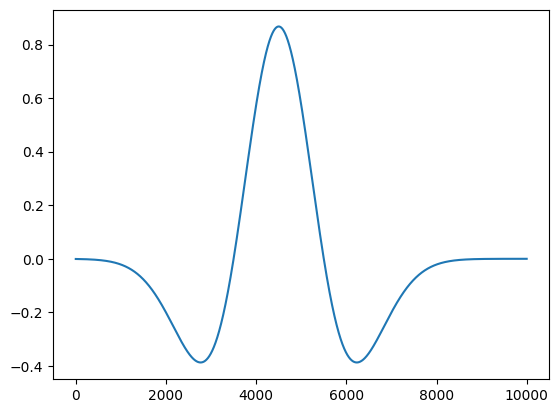

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(u, sigma):
  wavelet1 = (2 / (np.sqrt(3 * sigma) * np.pi**(1/4))) * ( 1 - (u**2 / sigma**2)) * np.exp(-u**2 / (2 * sigma**2))
  return wavelet1

c = 4.5 # parámetro para centrar la wavelet
plt.plot(mexican_hat(x - c, 1))


### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$.

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

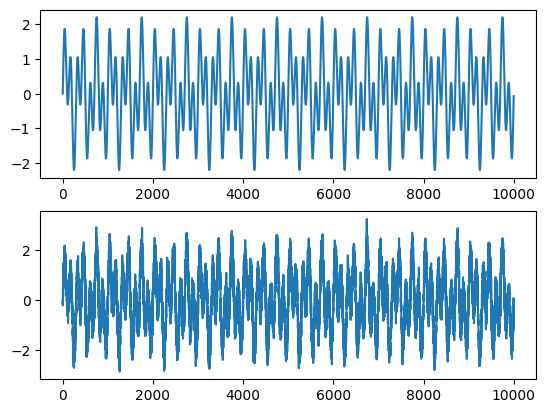

In [77]:
def f(x, A, f, theta):
  return A * np.sin(2 * np.pi * f * x + 2 * np.pi * theta)

f = f(x, 1, 3, 0) + f(x, 1.2, 7, 0)
plt.subplot(2, 1, 1)
plt.plot(f)
f = f + 0.3 * np.random.randn(len(x)) # se genera señal con ruido que será utilizada en la transformada wavelet
plt.subplot(2, 1, 2)
plt.plot(f)

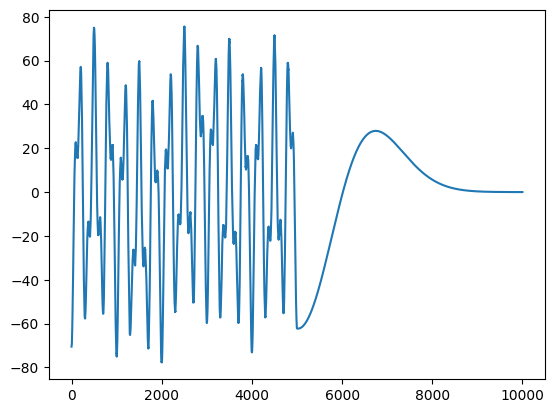

In [78]:
def twav(signal):
  wav = mexican_hat(x, 1)
  return np.convolve(signal, wav, 'same') # genera la convolución entre la wavelet y la señal

plt.plot(twav(f))

###  3.2.1. Explica el siguiente fragmento de código en detalle

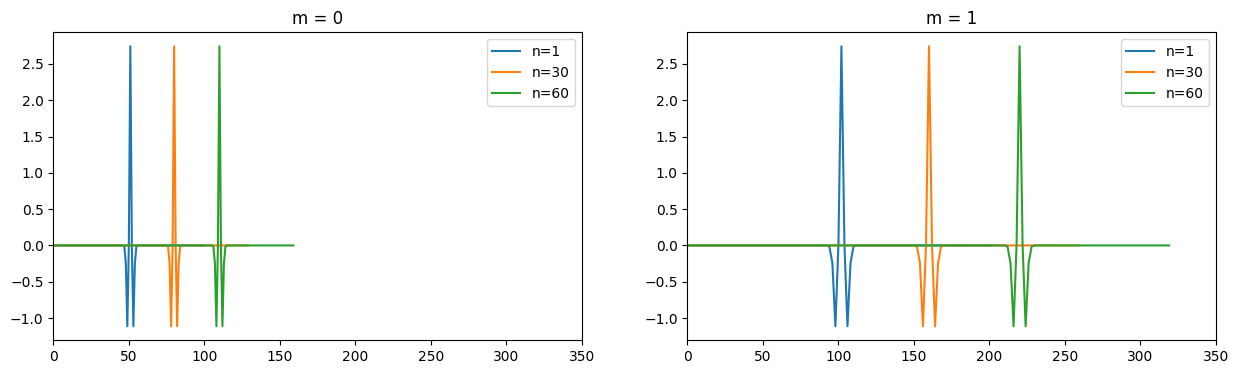

In [79]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
def psi_mn(psi, m, n): # se define la wavelet hija con "psi" como la wavelet madre
    a = 2**m # se definen los parámetros de escalado
    b = n*2**m # se definen los parámetros de traslación. Aparece "m" para que el traslado sea acorde al tamaño y así no desperdiciar recursos computacionales
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi) # se desarrolla la interpolación de los datos para el rango [b:b+len(psi)*a]
    return wav # retorna la wavelet hija en función de la "psi" madre, m y n

psi = mexican_hat(np.arange(-5,5,0.1), 0.1) # define la wavelet madre en su formato de "mexican_hat"
xlim = (0,350)
ns = [1, 30, 60] # rango de valores de traslado
ms = [0, 1] # rango de valores de contracción. Estos valores harán que el traslado sea mayor, pero será el mismo relativo a la contracción de la wavelet
plt.figure(figsize=(15,4))
plt.subplot(121)

for mi in range(len(ms)): # genera las diferentes contracciones de la wavelet
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns: # genera las traslaciones de la wavelet
        plt.plot(psi_mn(psi, m, n), label="n="+str(n)) # genera los gráficos para las diferentes "m", y presentas las wavelets con sus traslaciones
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()

### 3.2.2 completa el siguiente código para realizar la transformada


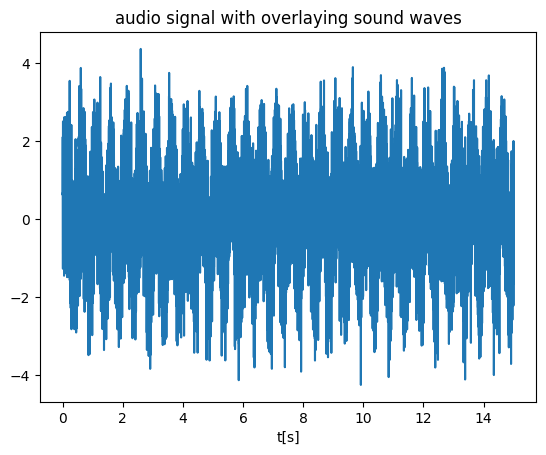

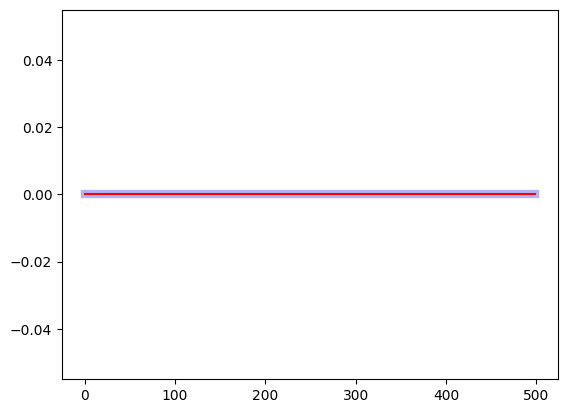

In [80]:

"""Transformed considering the sum over the section under study"""
def twav_mn(f, psi, m, n):
    f_scaled = 0
    transform_scaled =  0
    return transform_scaled

"""Naive Transform adding over the whole length"""

def twav_mn_naive(f, psi, m, n):
    pmn = 0
    transform = 0
    return transform


m = 3 #single value for m
ns = np.arange(1000,1500)
res=1000 #resolution
freq=2 #frequency
"""Creating a wave to analyse"""
x = np.arange(0,15000,1) # Produces [0, 100) with steps of 2.
noise = np.random.normal(0,1, len(x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
#adding noise
audio=np.sin(np.arange(15000)*2*np.pi*freq/res)+noise


transformed_sweept=[twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept=[twav_mn_naive(audio, psi, m, n) for n in ns]

plt.plot(np.arange(len(audio),dtype="float32")/res,audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.show()



plt.plot(transformed_sweept,color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()

### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño.

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia.
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

In [81]:
import pandas as pd
import pywt

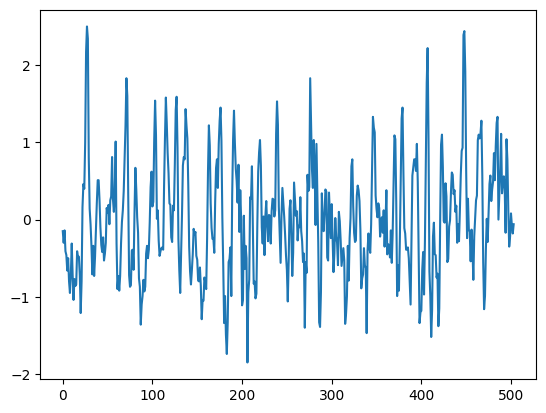

In [82]:
signal = pd.read_csv('datos_fenomeno_del_niño.txt', header=None, names=['strain'])
plt.plot(signal)

In [83]:
coeffs, freqs = pywt.cwt(signal, np.linspace(0.1, 1, 504), 'mexh')

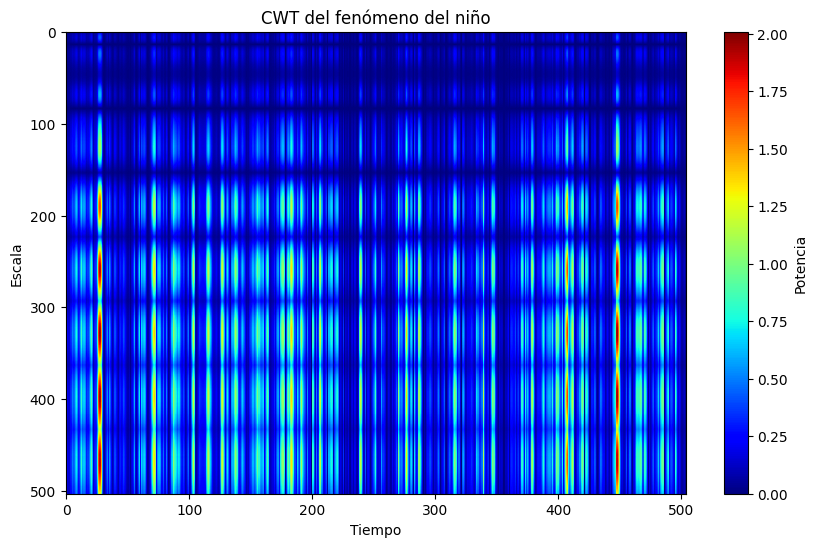

In [84]:
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coeffs), aspect='auto', cmap='jet')
plt.colorbar(label="Potencia")
plt.ylabel("Escala")
plt.xlabel("Tiempo")
plt.title("CWT del fenómeno del niño")
plt.show()

### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

El fenómeno del niño genera un aumento de la temperatura en el oceano pacífico. Al utilizar la transformada wavelet se puede conseguir un mapa de calor con respecto del tiempo, con lo que se puede estudiar el comportamiento periódico que tenga dicho fenómeno. La frecuencia permite magnificar las temperaturas, donde los puntos de mayor potencia son donde se concentraron las temperaturas en ese grupo de muestras.


## 4. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/